# EARLY DETECTION OF SEPSIS ON CLINICAL DATA USING MACHINE LEARNING ALGORITHMS

# IMPORT STATEMENTS

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

Seaborn is a library for making statistical graphics in Python.

pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

read_csv is an important pandas function to read csv files and do operations on it.

In [2]:
dataset = pd.read_csv("C:/Users/hcyen/SCA/sepsis.csv")

The value_counts() method returns a Series containing the counts of unique values. This means, for any column in a dataframe, this method returns the count of unique entries in that column.

In [3]:
dataset['SepsisLabel'].value_counts()

0    37945
1      864
Name: SepsisLabel, dtype: int64

method plt.pie() is used to create a plot.

plt.show() is used to display the figure.

The countplot plot can be thought of as a histogram across a categorical variable.

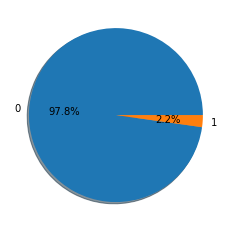

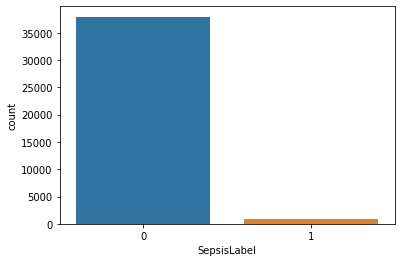

In [4]:
plt.pie(dataset['SepsisLabel'].value_counts(), labels=['0','1'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(dataset['SepsisLabel'], label="Count")
plt.show()

Resample arrays or sparse matrices in a consistent way.

In [5]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

The resample() function is used to resample time-series data.

In [6]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37945,    # to match majority class
                                 random_state=123) # reproducible results

The concat() function does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic of the indexes on the other axes.

In [7]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [8]:
df_upsampled.SepsisLabel.value_counts()

1    37945
0    37945
Name: SepsisLabel, dtype: int64

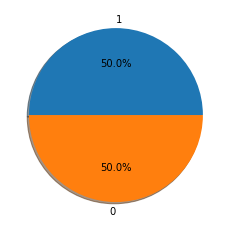

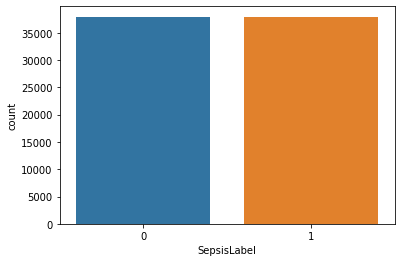

In [9]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(df_upsampled['SepsisLabel'], label="Count")
plt.show()

Now that we've read our dataset.

Create dataset X by excluding label column

In [10]:
X = df_upsampled[df_upsampled.columns[0:40]].values

Create dataset Y by only label column

In [11]:
Y = df_upsampled[df_upsampled.columns[40:]].values

Printing dimensions of sepsis dataset

In [12]:
print("sepsis dimensions : {}".format(df_upsampled.shape))

sepsis dimensions : (75890, 41)


Printing dimensions of sepsis dataset without label column

In [13]:
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (75890, 40)


Printing dimensions of sepsis dataset only with label column

In [14]:
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (75890, 1)


LabelEncoder is used to normalize labels.

In [15]:
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

C:\Users\hcyen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For splitting data into train set and test set, train_test_split function is used

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(60712, 40)
Testing data dimensions :(15178, 40)


# Comparing Machine Learning Algorithms Consistently

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.

You can achieve this by forcing each algorithm to be evaluated on a consistent test harness.

In the followin code, we have considered the following machine learning algorithms

MLP Classifier,

AdaBoost Classifier,

Gradient Boosting Classifier,

GaussianNB,

Linear Discriminant Analysis,

Quadratic Discriminant Analysis.

And also print the accuracy for the algorithms mentioned above respectively.

In [19]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
classifiers = [
    MLPClassifier(
    activation='tanh',
    solver='lbfgs',
    early_stopping=False,
    hidden_layer_sizes=(40,10,10,10,10, 2),
    random_state=1,
    batch_size='auto',
    max_iter=13000,
    learning_rate_init=1e-5,
    tol=1e-4,
),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

MLPClassifier
****Results****
Accuracy: 94.0506%
Log Loss: 0.17823628759351812
AdaBoostClassifier
****Results****
Accuracy: 79.8261%
Log Loss: 0.673179268387368
GradientBoostingClassifier
****Results****
Accuracy: 91.3954%
Log Loss: 0.31111735634487514
GaussianNB
****Results****
Accuracy: 57.7678%
Log Loss: 2.120984212868764


C:\Users\hcyen\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\hcyen\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LinearDiscriminantAnalysis
****Results****
Accuracy: 72.4074%
Log Loss: 0.5490759157904654
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 50.9224%
Log Loss: 14.830397068643624


For comparision purpose, We have printed Bar Graph for Classifier Accuracy and Classifier Log Loss.

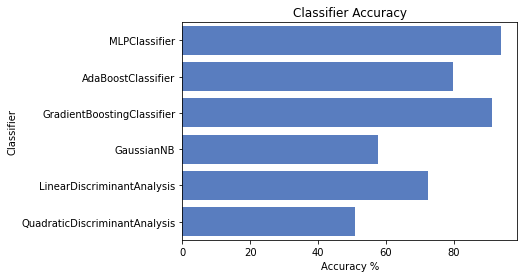

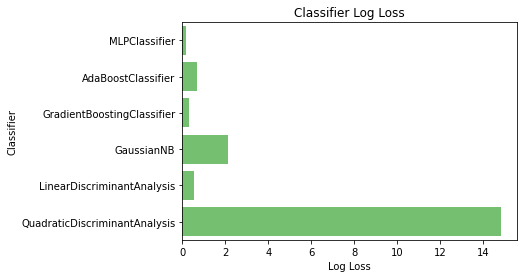

In [20]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()